In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hear_disease = pd.read_csv("../data/heart-disease.csv")
hear_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
X = hear_disease.drop("target", axis = 1)
y = hear_disease["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
# 2.chose right model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#default hyperparam
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit model to data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
y_label = clf.predict(X_test)

In [9]:
y_label

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [10]:
y_test

187    0
298    0
54     1
95     1
219    0
      ..
210    0
289    0
141    1
45     1
87     1
Name: target, Length: 61, dtype: int64

In [11]:
clf.score(X_train, y_train)

1.0

In [12]:
clf.score(X_test, y_test)

0.9016393442622951

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_label))


              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.86      0.97      0.91        33

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [14]:
confusion_matrix(y_test, y_label)

array([[23,  5],
       [ 1, 32]])

In [15]:
accuracy_score(y_test, y_label)

0.9016393442622951

In [16]:
# improving model
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators = i)
    clf.fit(X_train, y_train)
#     y_label = clf.predict(X_test)
    print(clf.score(X_test, y_test)*100)
    print()

    

Trying model with 10 estimators..
88.52459016393442

Trying model with 20 estimators..
86.88524590163934

Trying model with 30 estimators..
83.60655737704919

Trying model with 40 estimators..
86.88524590163934

Trying model with 50 estimators..
88.52459016393442

Trying model with 60 estimators..
86.88524590163934

Trying model with 70 estimators..
90.1639344262295

Trying model with 80 estimators..
88.52459016393442

Trying model with 90 estimators..
88.52459016393442



In [17]:
import pickle 
pickle.dump(clf, open("random_forest_model_1.pkl","wb"))


In [18]:
load_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
load_model.score(X_test, y_test)

0.8852459016393442

### Getting data ready
1. Split data into features and lables ('X' and y)
2. filling (imputing) / disregarding missing values
3. converting non-numeric to num val (feature encoding)

In [19]:
hear_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
X = hear_disease.drop("target", axis = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y = hear_disease["target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it is numerical

In [22]:
car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [23]:
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train.shape, X_test.shape

((800, 4), (200, 4))

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder = "passthrough")
transformed_X = tranformer.fit_transform(X)
transformed_X

In [ ]:
X

In [ ]:
X["Make"].unique()


In [ ]:
len(X["Make"].unique())

In [ ]:
len(X["Colour"].unique())

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
X = transformed_X

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

### 1.2 What if missing data

1. fill them with some val
2. remove samples with missing data

In [ ]:
car2_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car2_sales_missing

In [ ]:
car2_sales_missing.isna().sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

category = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, category)], remainder="passthrough")

X = car2_sales_missing.drop("Price", axis = 1)
transformed_X = tranformer.fit_transform(X)

In [ ]:
data_x

### Fill missing data with panda

In [ ]:
car2_sales_missing.isna().sum()

In [ ]:
car2_sales_missing.Doors.value_counts()

In [ ]:
#Fill the "Make" column
car2_sales_missing["Make"].fillna("missing", inplace = True)
car2_sales_missing["Colour"].fillna("missing", inplace = True)
car2_sales_missing["Odometer (KM)"].fillna(car2_sales_missing["Odometer (KM)"].mean(), inplace = True)
car2_sales_missing["Doors"].fillna(4, inplace = True)




In [ ]:
car2_sales_missing.dropna(inplace = True)

In [ ]:
car2_sales_missing.isna().sum()
#no missing values

In [ ]:
X = car2_sales_missing.drop("Price", axis = 1)
y = car2_sales_missing["Price"]
X

In [ ]:
car2_sales_missing

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder = "passthrough")
transformed_X = tranformer.fit_transform(car2_sales_missing)
transformed_X

In [ ]:
transformed_data = pd.DataFrame(transformed_X)
transformed_data

In [ ]:
X = transformed_data.drop(labels = 15, axis = 1)
y = transformed_data[15]

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)


### Fill missing data with Scikit Learn

In [ ]:
car3_missing_data = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car3_missing_data

In [ ]:
car3_missing_data.isna().sum()

In [ ]:
car3_missing_data.dropna(subset = ["Price"], inplace = True)
car3_missing_data.isna().sum()

In [ ]:
# split into to x and Y
X = car3_missing_data.drop("Price", axis = 1)
y = car3_missing_data["Price"]


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

car_imputer = SimpleImputer(strategy = "constant", fill_value= "missing")
door_imp = SimpleImputer(strategy="constant", fill_value= 4)
num_imp = SimpleImputer(strategy = "mean")

car_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer([("cat_imputer", car_imputer, car_features), 
                            ("door_imp", door_imp, door_features),
                            ("num_imp", num_imp, num_features)
])

filled_X = imputer.fit_transform(X)


In [ ]:
car4_filled = pd.DataFrame(filled_X, columns = ["Make", "Colour", "Doors", "Odometer"])

In [ ]:
car4_filled

In [ ]:
car4_filled.isna().sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = [ "Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

trans = ColumnTransformer([("one_hot", one_hot, cat_features)],remainder = "passthrough")
X_trans = trans.fit_transform(car4_filled)

In [ ]:
X_trans

In [ ]:
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size = 0.2)


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

### Chose right estimator/ algo for model

* Classification model - predicting category
clf as classifier estimator

* Regression model - predicting number like Price

*how to choose?
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [1]:
# get Calif datatset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
import pandas as pd
df_housing = pd.DataFrame(housing["data"], columns = housing["feature_names"])
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
df_housing["MedHouseVal"] = pd.DataFrame(housing["target"])

In [5]:
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df_housing.isna().sum()

In [6]:
X = df_housing.drop("MedHouseVal", axis = 1)
y = df_housing["MedHouseVal"]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
# from sklearn import linear_model
# >>> reg = linear_model.Ridge(alpha=.5)
# >>> reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
# Ridge(alpha=0.5)

from sklearn.linear_model import Ridge

model = Ridge()

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
# >>> from sklearn import svm
# >>> X = [[0, 0], [2, 2]]
# >>> y = [0.5, 2.5]
# >>> regr = svm.SVR()
# >>> regr.fit(X, y)
from sklearn.svm import SVR

regr = SVR()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

### Classification model

In [ ]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease

In [ ]:
# from sklearn.svm import LinearSVC
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_classification
# X, y = make_classification(n_features=4, random_state=0)
# clf = make_pipeline(StandardScaler(),
#                     LinearSVC(dual="auto", random_state=0, tol=1e-5))
# clf.fit(X, y)

from sklearn.svm import LinearSVC


np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]
X.isna().sum()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
np.random.seed(40)

clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(40)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
# if structured data -> ensemble
# if unstructured -> deep learning transfer learning

### Fitting model and make prediction

1. Predict()
2. Predict_proba()


In [ ]:
heart_disease

In [ ]:
# X - features, features variable, data
# y - labels, targets, target var

X.loc[0]

In [ ]:
y_pred = clf.predict(X_test) #it is predict
y_pred

In [ ]:
np.array(y_test) # it is truth

In [ ]:
np.mean(y_pred == y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

In [ ]:
clf.predict_proba(X_test) # provba of each value, that number is 0.86% while 1 is 14%

In [26]:
df_housing

NameError: name 'df_housing' is not defined

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
data_housing= fetch_california_housing()

In [2]:
data_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing = pd.DataFrame(data_housing["data"], columns =data_housing["feature_names"] )

In [4]:
housing["target"] = data_housing["target"]

In [5]:
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = housing.drop("target", axis = 1)
y = housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)
np.random.seed(42)


In [14]:
y_preds = model.predict(X_test)
y_preds

array([0.48395  , 0.6888   , 4.9452867, ..., 4.8017982, 0.69765  ,
       1.66198  ])

In [15]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3283782603439924

### evaluating with score method

In [18]:
model.score(X_test, y_test) #higest is 1.0 accurac, lowest 0.0

0.8044207097337891

In [22]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X, y)
#np.mean(cross_val_score(model, X, y)) to get mean value

### Classification model evaluation

In [24]:
heart_disease = pd.read_csv("../data/heart-disease.csv")

In [26]:

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]


In [27]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
cvs_mean = cross_val_score(model, X, y)

In [31]:
cvs_mean

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [30]:
np.mean(cvs_mean)

0.8183606557377049

In [36]:
print(f"Heart dis classifierCross validator mean secore :{np.mean(cvs_mean)*100:.2f}%")

Heart dis classifierCross validator mean secore :81.84%


**AUC**

#comparison of model true positive rate and models false postitve rate (FPR)
* **True posititvie** -> model 1 truth is 1
* **false positive** -> model 1 truth is 0
* **true negative** -> model 0, truth 0
* **false negative** -> model 0, truth is 1

In [39]:
from sklearn.metrics import roc_curve
y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [40]:
y_positive = y_probs[:,1]
y_positive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [41]:
fpr, tpr , thresholds = roc_curve(y_test, y_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [42]:
thresholds

array([2.  , 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
       0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
       0.06, 0.05, 0.  ])

In [43]:
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

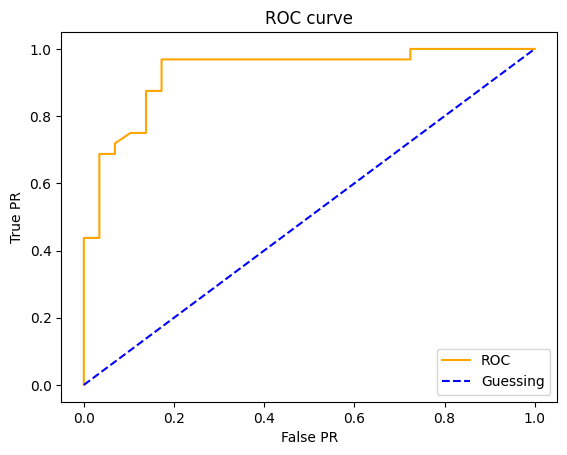

In [46]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    
    plt.plot([0,1], [0,1], color = "blue", linestyle = '--', label = "Guessing")
    
    plt.xlabel("False PR")
    plt.ylabel("True PR")
    
    plt.title("ROC curve")
    
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [48]:
from sklearn.metrics import roc_auc_score

#area under RUC curve
roc_auc_score(y_test, y_positive)

0.9304956896551724

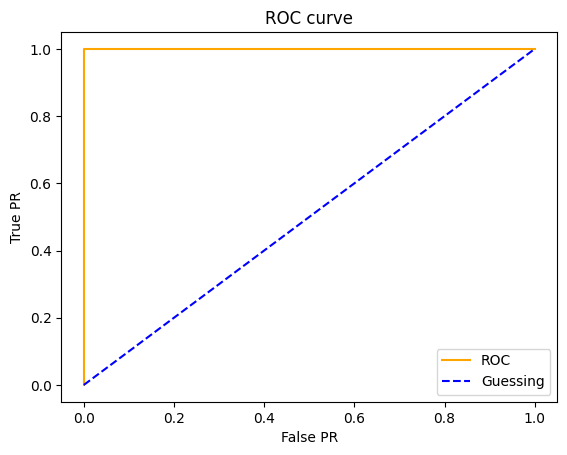

In [49]:
fpr, tpr, thre = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [50]:
roc_auc_score(y_test, y_test)

1.0

**Confusion metrics**

compare labels oof predicted abd actual give where is model got confused

In [54]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

In [55]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [56]:
# visualize

pd.crosstab(y_test, y_preds, rownames=["Act labels"], colnames=["predicted"])

predicted,0,1
Act labels,,
0,24,5
1,4,28


In [57]:
#seaborn heatmap
import seaborn as sns


<Axes: >

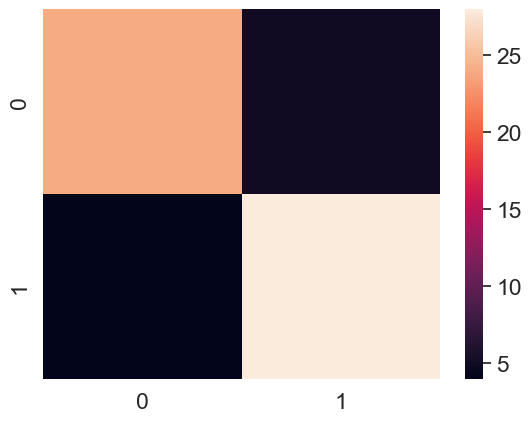

In [58]:
sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

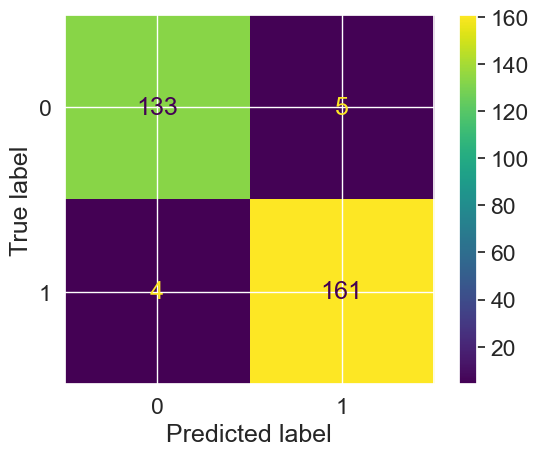

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = model, X= X, y=y)

In [61]:
len(X)

303

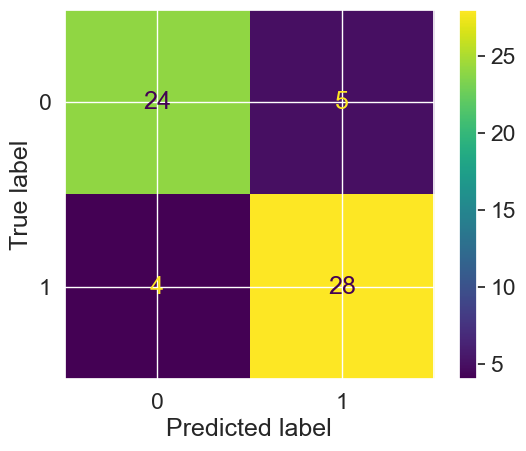

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

**Classification report**

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [65]:
model.score(X_test, y_test)

0.8524590163934426

In [67]:
disease_true = np.zeros(10000)

disease_true[0] = 1

disease_preds = np.zeros(10000)

print(classification_report(disease_true, disease_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9999
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Regression model evaluation
1. R^2 (coeff of determination)
2.Mean Absoluter error (MAE)
3. Mean squared error MSE

In [7]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
np.random.seed(42)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model = RandomForestRegressor()
#X and Y was taken from above after running housing database
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test) 

0.8066196804802649

In [9]:
y_test.mean()

2.0550030959302323

In [10]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [11]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [12]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8066196804802649

**Mean squared error MSE**

In [13]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.2534073069137548

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.3265721842781009

In [19]:
mae = pd.DataFrame(data = {"actual val": y_test, 
                           "predicetd val": y_pred})


In [31]:
mae["difference"] = abs(mae["actual val"]-mae["predicetd val"])

In [32]:
mae["difference"].sum()/len(mae)

0.3265721842781009

In [33]:
mae["diff^2"] = (mae["actual val"]-mae["predicetd val"])**2

In [34]:
mae["diff^2"].sum()/len(mae)

0.2534073069137548

In [35]:
mae

,actual val,predicetd val,difference,diff^2
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,0.412620,0.170255
16623,2.66800,1.947760,0.720240,0.518746
18086,5.00001,4.836378,0.163632,0.026775
2144,0.72300,0.717820,0.005180,0.000027


In [36]:
heart_disease = pd.read_csv("../data/heart-disease.csv")

In [37]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()
clf.fit(X,y)
score = cross_val_score(clf, X, y , cv = 5, scoring=None)

In [40]:
score

array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.75      ])

In [41]:
score = cross_val_score(clf, X, y , cv = 5, scoring="accuracy")

In [42]:
score

array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.78333333])

In [49]:
np.random.seed(42)

score = cross_val_score(clf, X, y , cv = 5, scoring="precision")
score

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

### Improving model

firts prediction = baseline prediction

From data perspective: 
* maybe more data?
* could we improve data? maybe more feature

From model perspective
* different model?
* could we improve current model

Parameter = model find patterns
Hyperparaamter = setting model adjust improv to find pattern

3 ways to adjust hyperparameters:
1. nby hand
2. randomly by RandomSearchCV
3. GridSearchCv


In [50]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we will adjust 
* max_depth
* max_features
* min_sample leaf
* min sample split
* n_estimators

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate (y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precission = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric = {" accuracy": round(accuracy,2),
              "precission": round(precission,2),
             "recall": round(recall,2),
             "f1": round(f1,2)}
    
    print(f"Acc {accuracy*100:.2f}%")
    print(f"Precision {precission:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"f1 : {f1:.2f}")
    
    return metric

In [55]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [56]:
np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac = 1)
heart_disease_shuffled

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

train_split = round(0.7*len(heart_disease_shuffled))
valid_split = round(train_split+0.15*len(heart_disease_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

In [58]:
np.random.seed(42)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)
y_preds = clf.predict(X_valid)

baseline_metrics = evaluate(y_valid, y_preds)
baseline_metrics;

Acc 82.22%
Precision 0.84
Recall: 0.84
f1 : 0.84


In [63]:
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators = 1000)

clf_2.fit(X_train, y_train)
y_preds = clf_2.predict(X_valid)

baseline_metrics = evaluate(y_valid, y_preds)
baseline_metrics;

Acc 82.22%
Precision 0.81
Recall: 0.88
f1 : 0.85


In [64]:
np.random.seed(42)

clf_2 = RandomForestClassifier(max_depth = 1000)

clf_2.fit(X_train, y_train)
y_preds = clf_2.predict(X_valid)

baseline_metrics = evaluate(y_valid, y_preds)
baseline_metrics;

Acc 82.22%
Precision 0.84
Recall: 0.84
f1 : 0.84


In [71]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100,200,500,1000,1200],
       "max_depth": [None, 5, 10, 20,30],
       "max_features": ["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2)

clf = RandomForestClassifier()

rs_clf = RandomizedSearchCV(estimator = clf, 
                           param_distributions = grid,
                           n_iter= 10,
                           cv = 5,
                           verbose = 2)
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [72]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [78]:
rs_y_pred= rs_clf.predict(X_test)
rs_metrics = evaluate(y_test, rs_y_pred)

Acc 81.97%
Precision 0.77
Recall: 0.86
f1 : 0.81


In [76]:
from sklearn.model_selection import GridSearchCV

grid = {"n_estimators": [100,200,500],
       "max_depth": [None, 5, 10],
       "max_features": ["sqrt"],
       "min_samples_split":[2,4],
       "min_samples_leaf":[1,2,4]}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2)

clf = RandomForestClassifier()

gr_clf = GridSearchCV(estimator = clf, 
                           param_grid = grid,
                           cv = 5,
                           verbose = 2)
gr_clf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=None,

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [77]:
gr_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [79]:
gr_y = gr_clf.predict(X_test)
gr_metrics = evaluate(y_test, gr_y)

Acc 81.97%
Precision 0.76
Recall: 0.89
f1 : 0.82


### Saving and loading data

* python's pickle moduld
* joblib module

In [80]:
import pickle

pickle.dump(gr_clf, open("grid_search_rf.pkl", "wb"))

In [82]:
loaded_model = pickle.load(open("grid_search_rf.pkl", "rb"))


In [83]:
y_pred=loaded_model.predict(X_test)
evaluate(y_test, y_pred)

Acc 81.97%
Precision 0.76
Recall: 0.89
f1 : 0.82


{' accuracy': 0.82, 'precission': 0.76, 'recall': 0.89, 'f1': 0.82}

In [84]:
from joblib import dump, load

dump(gr_clf, open("grid_search_rf.joblib", "wb"))
loaded_model = load(open("grid_search_rf.joblib", "rb"))

y_pred=loaded_model.predict(X_test)
evaluate(y_test, y_pred)

Acc 81.97%
Precision 0.76
Recall: 0.89
f1 : 0.82


{' accuracy': 0.82, 'precission': 0.76, 'recall': 0.89, 'f1': 0.82}